In [13]:
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import classification_report

In [ ]:
#Sazila Azka Adzkia
#16213012
#UAS DETEKSI ANOMALI

In [14]:
data=pd.read_csv("ILPD2.csv")#using the semicolon as a separator

In [15]:
data.head()

,Age,Gender,TB,DB,Alkphos,Sgpt_AA,Sgot_AA,TP,Albumin,A/G,class
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [16]:
data.dtypes

Age          int64
Gender      object
TB         float64
DB         float64
Alkphos      int64
Sgpt_AA      int64
Sgot_AA      int64
TP         float64
Albumin    float64
A/G        float64
class        int64
dtype: object

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      583 non-null    int64  
 1   Gender   583 non-null    object 
 2   TB       583 non-null    float64
 3   DB       583 non-null    float64
 4   Alkphos  583 non-null    int64  
 5   Sgpt_AA  583 non-null    int64  
 6   Sgot_AA  583 non-null    int64  
 7   TP       583 non-null    float64
 8   Albumin  583 non-null    float64
 9   A/G      579 non-null    float64
 10  class    583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [18]:
data.describe()

,Age,TB,DB,Alkphos,Sgpt_AA,Sgot_AA,TP,Albumin,A/G,class
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [19]:
data.shape

(583, 11)

In [20]:
data.isnull().sum() #no null values in any of the columns

Age        0
Gender     0
TB         0
DB         0
Alkphos    0
Sgpt_AA    0
Sgot_AA    0
TP         0
Albumin    0
A/G        4
class      0
dtype: int64

In [21]:
label_encoder=preprocessing.LabelEncoder()
data['Age']=label_encoder.fit_transform(data['Age'])

In [22]:
data.head() #bankruptcy value is 0 and non-bankruptcy value is 1

,Age,Gender,TB,DB,Alkphos,Sgpt_AA,Sgot_AA,TP,Albumin,A/G,class
0,58,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,55,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,55,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,52,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,64,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [23]:
org_data=pd.read_csv("ILPD.csv")

In [24]:
data=data.drop(['Age'],axis=1)#class column dropped and the class_binary column retained.

In [25]:
data.head()

,Gender,TB,DB,Alkphos,Sgpt_AA,Sgot_AA,TP,Albumin,A/G,class
0,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [26]:
data=data.drop(['Gender'],axis=1)#class column dropped and the class_binary column retained.

In [27]:
data.head()

,TB,DB,Alkphos,Sgpt_AA,Sgot_AA,TP,Albumin,A/G,class
0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [28]:
#EDA

In [29]:
data.head()

,TB,DB,Alkphos,Sgpt_AA,Sgot_AA,TP,Albumin,A/G,class
0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [30]:
data.corr()

,TB,DB,Alkphos,Sgpt_AA,Sgot_AA,TP,Albumin,A/G,class
TB,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,-0.220208
DB,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,-0.246046
Alkphos,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,-0.184866
Sgpt_AA,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,-0.163416
Sgot_AA,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,-0.151934
TP,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,0.035008
Albumin,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,0.161388
A/G,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,0.163131
class,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,0.163131,1.000000


<Axes: >

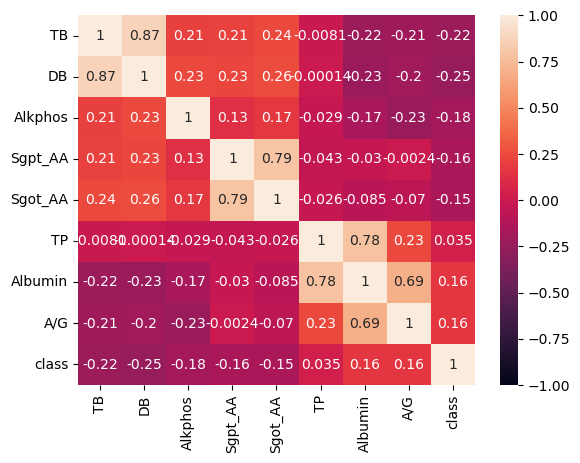

In [31]:
sns.heatmap(data.corr(),vmin= -1,vmax= 1,annot= True)#correlation range is -1 to 1

<Axes: xlabel='Sgpt_AA', ylabel='Count'>

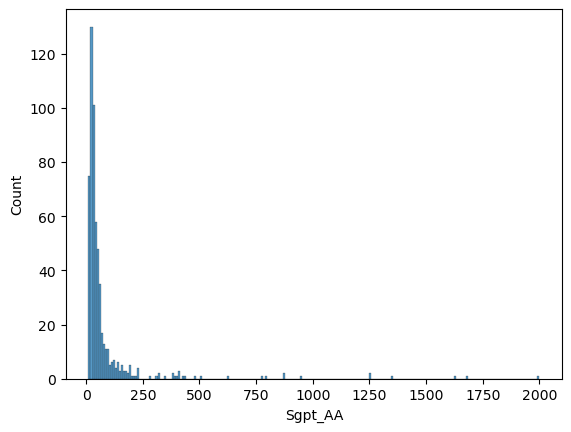

In [32]:
sns.histplot(data['Sgpt_AA'])

<Axes: xlabel='Sgot_AA', ylabel='Count'>

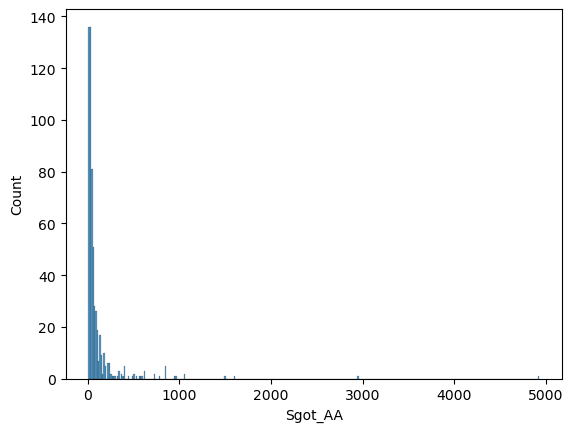

In [33]:
sns.histplot(data['Sgot_AA'])

<Axes: xlabel='class'>

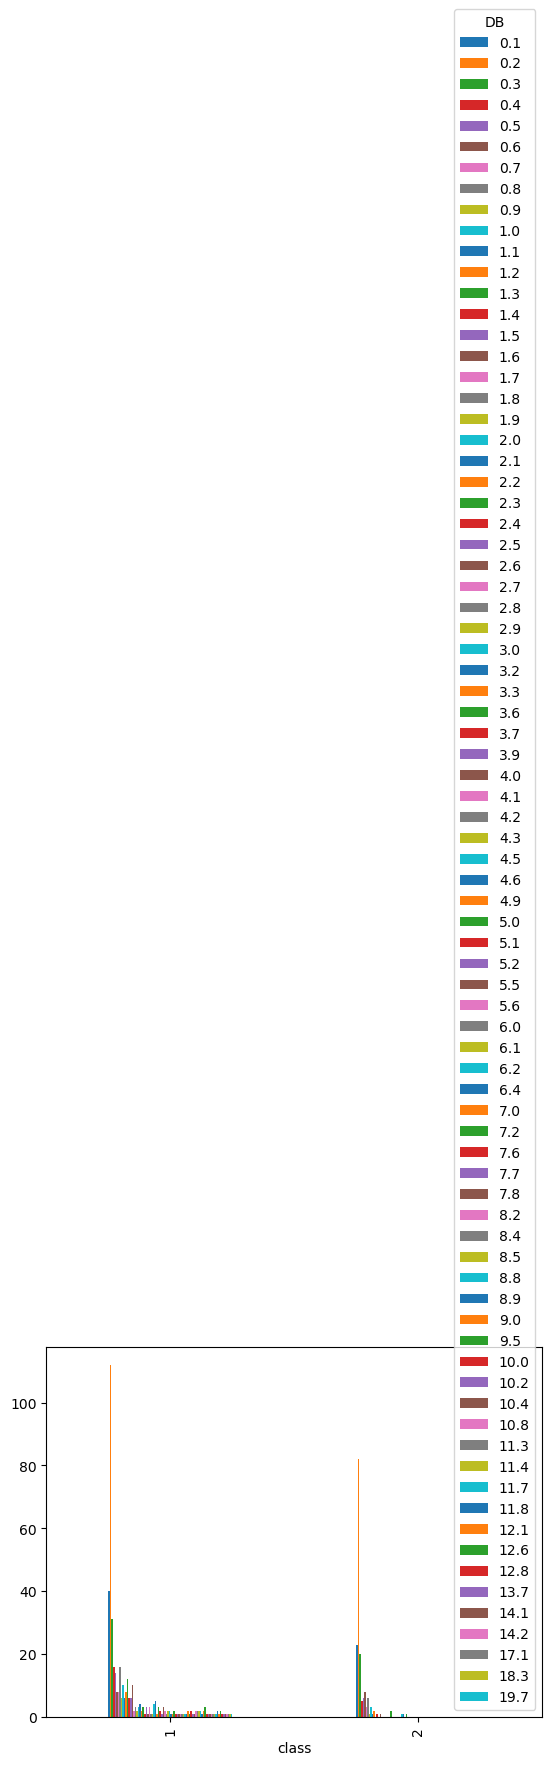

In [39]:
pd.crosstab(data['class'], data['DB']).plot(kind='bar')

<Axes: xlabel='class'>

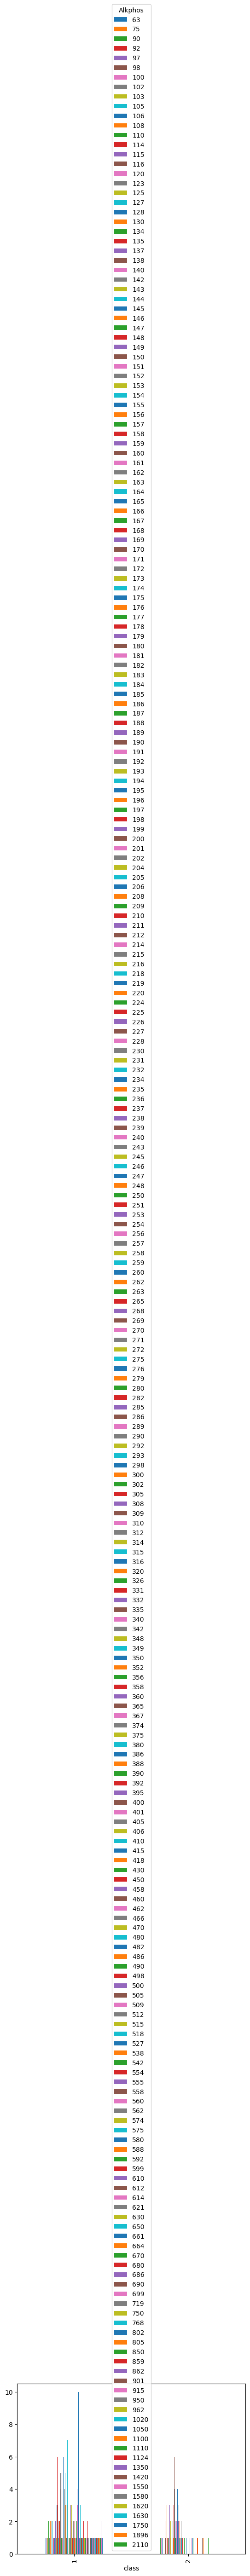

In [40]:
pd.crosstab(data['class'], data['Alkphos']).plot(kind='bar')

<Axes: xlabel='class'>

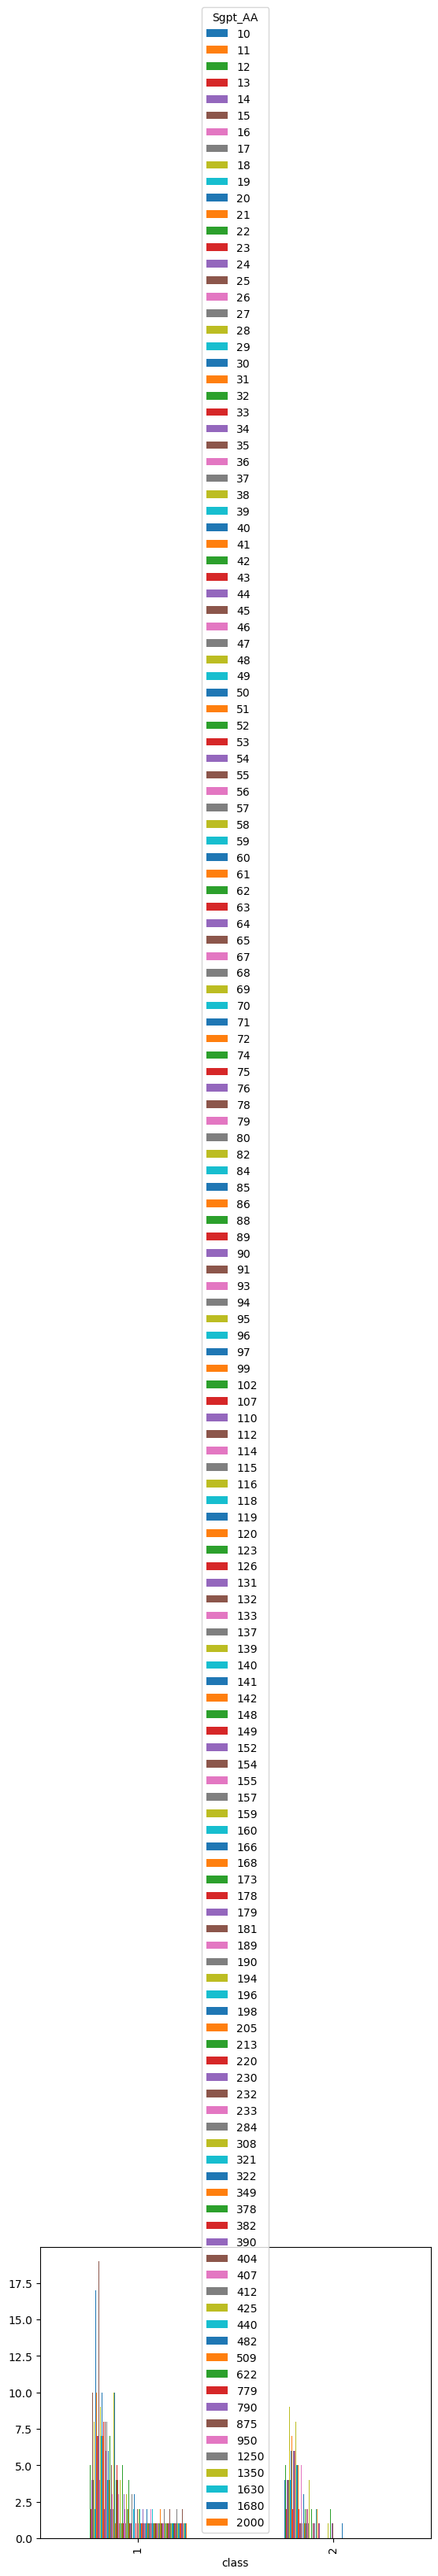

In [41]:
pd.crosstab(data['class'], data['Sgpt_AA']).plot(kind='bar')

<Axes: xlabel='class'>

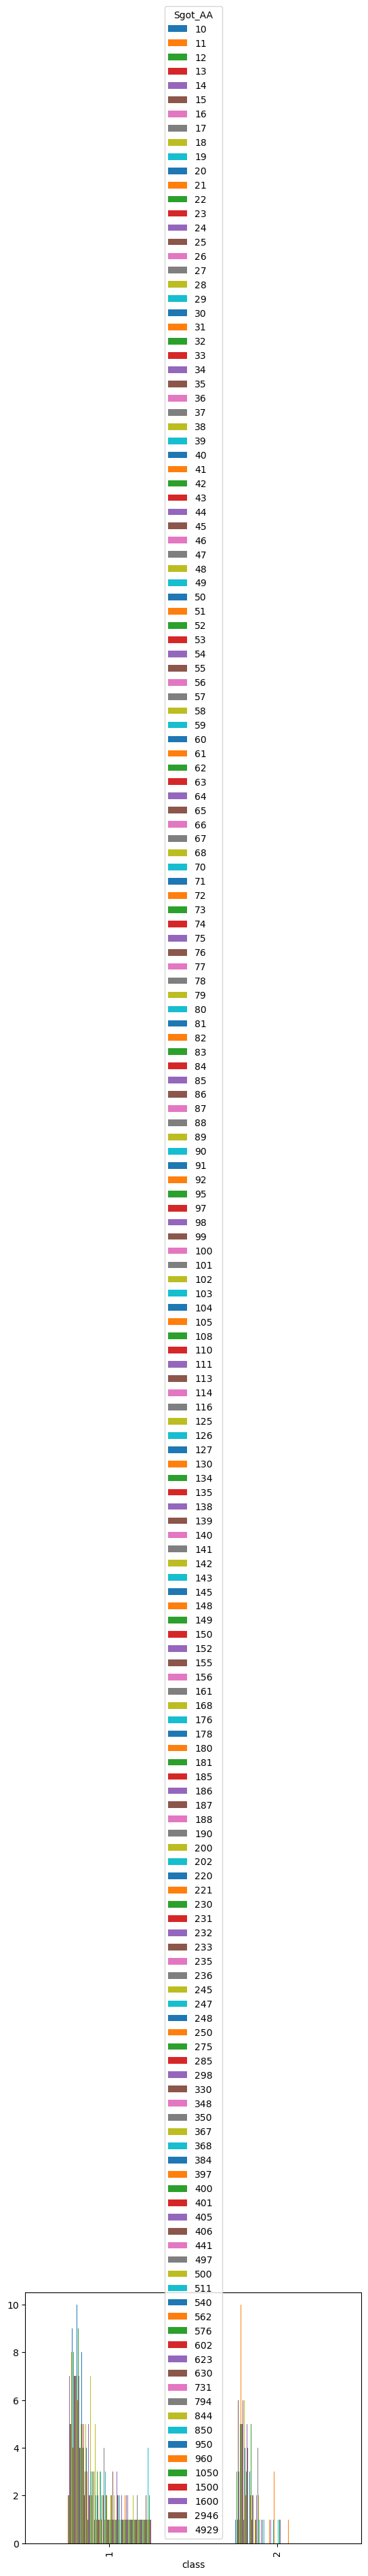

In [42]:
pd.crosstab(data['class'], data['Sgot_AA']).plot(kind='bar')

<Axes: xlabel='class'>

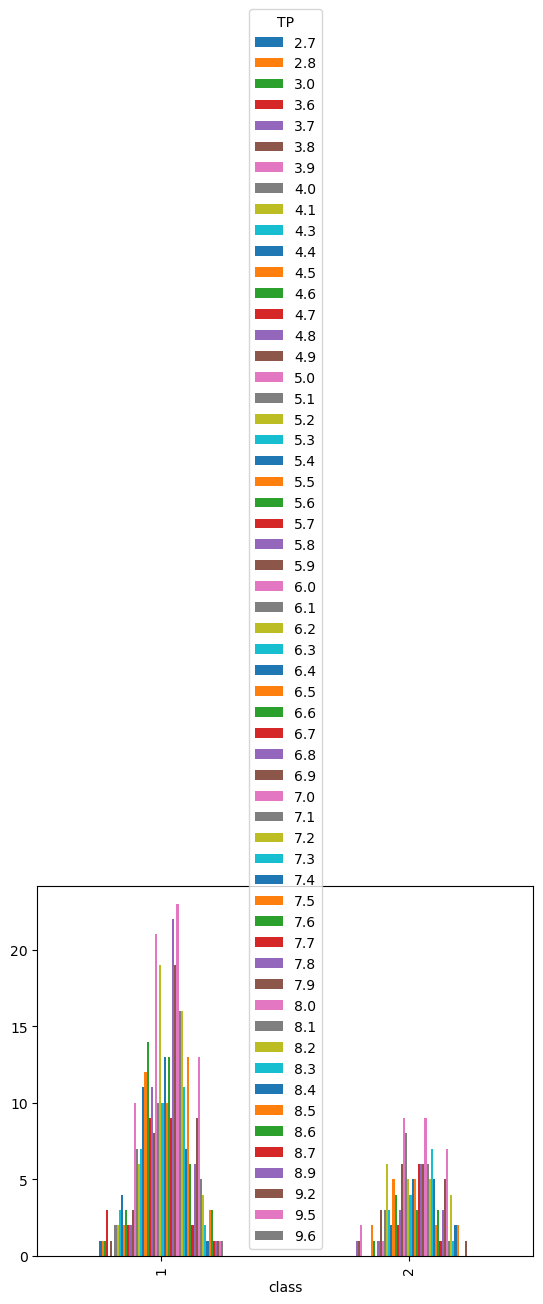

In [43]:
pd.crosstab(data['class'], data['TP']).plot(kind='bar')

<Axes: xlabel='class'>

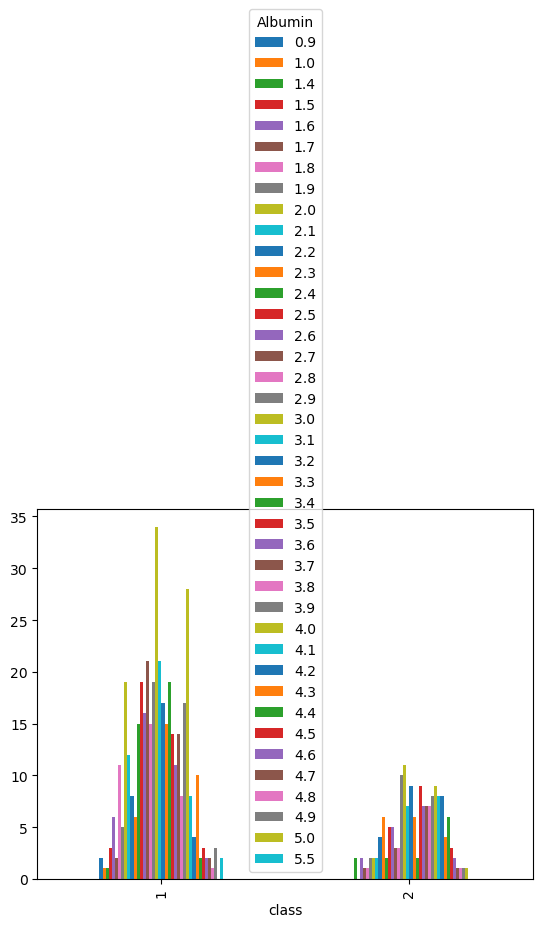

In [44]:
pd.crosstab(data['class'], data['Albumin']).plot(kind='bar')

<Axes: xlabel='class'>

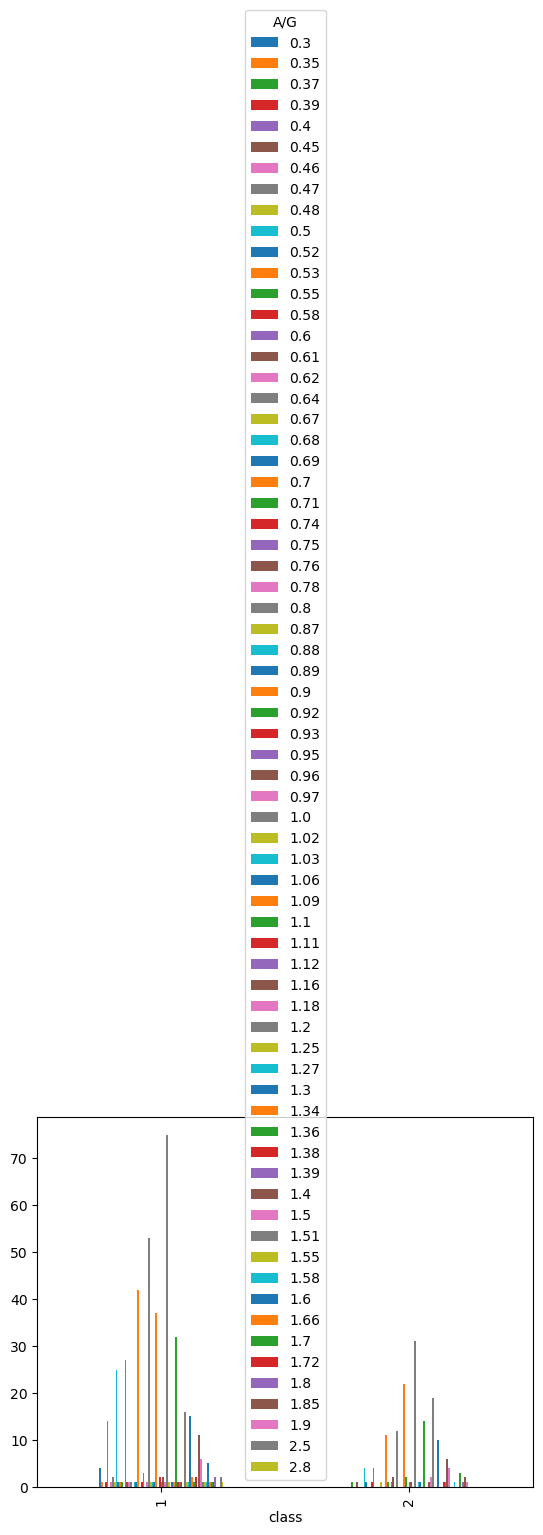

In [45]:
pd.crosstab(data['class'], data['A/G']).plot(kind='bar')

<Axes: xlabel='class'>

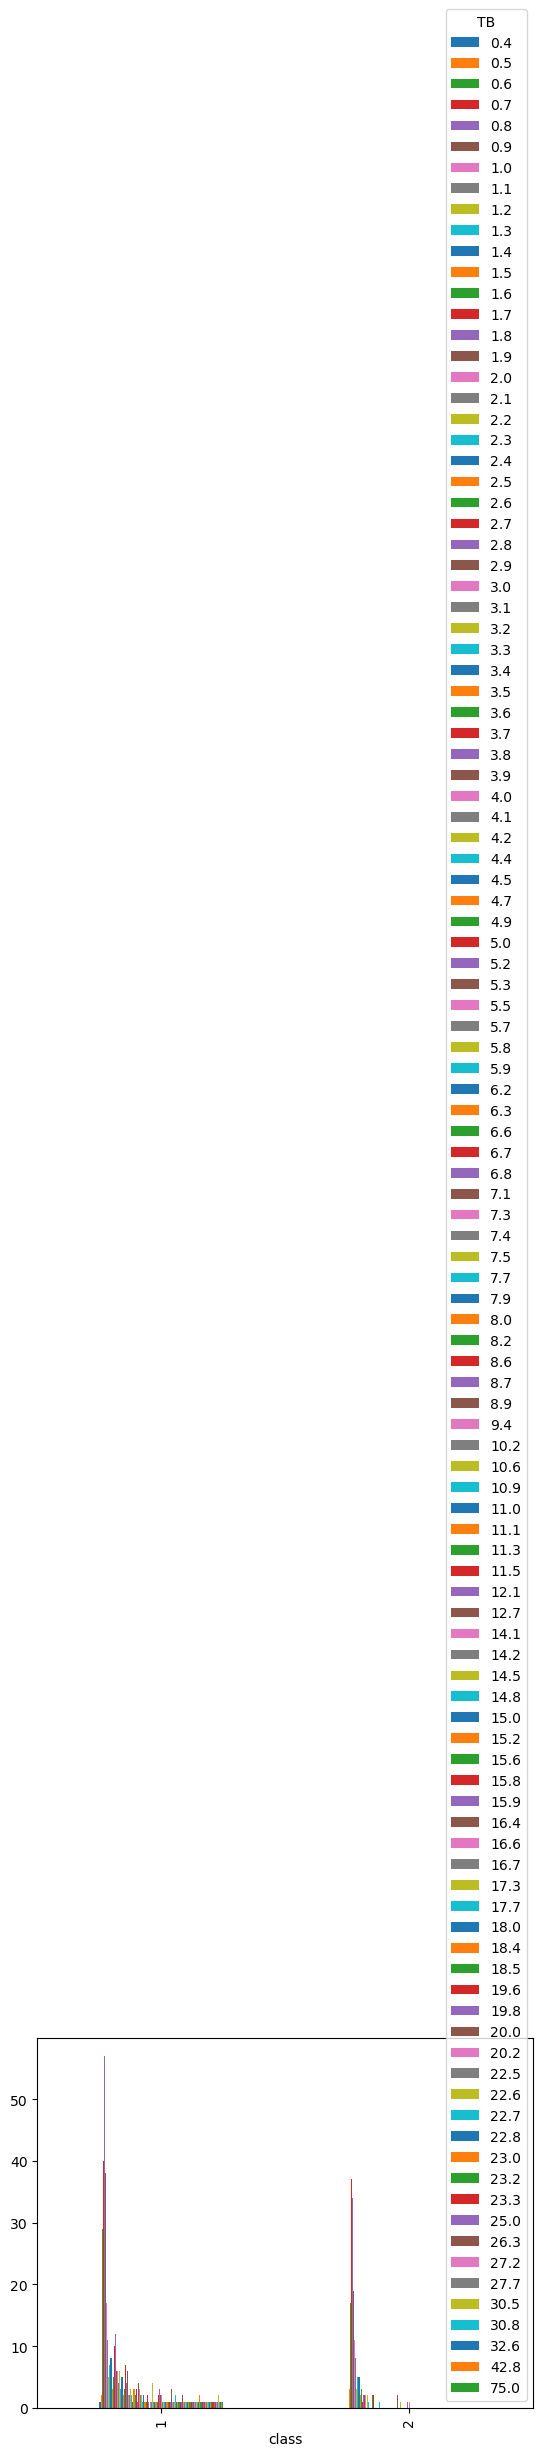

In [46]:
pd.crosstab(data['class'], data['TB']).plot(kind='bar')

In [53]:
data.shape

(583, 9)

In [ ]:
#Tambahin isolation forest buat remove outliers

In [58]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest

# Membuat objek imputer
imputer = SimpleImputer(strategy='mean')

# Mengisi nilai-nilai yang hilang dengan nilai rata-rata
data_imputed = imputer.fit_transform(data)

# Membuat objek model Isolation Forest
islf = IsolationForest(random_state=1, contamination=0.01)

# Melatih model pada data yang sudah diimputasi
islf.fit(data_imputed)

# Memprediksi anomali pada data yang sudah diimputasi
data['anomaly'] = islf.predict(data_imputed)


In [59]:
data[data['anomaly']==-1]

,TB,DB,Alkphos,Sgpt_AA,Sgot_AA,TP,Albumin,A/G,class,anomaly
117,12.7,6.2,194,2000,2946,5.7,3.3,1.3,1,-1
135,11.3,5.6,1110,1250,4929,7.0,2.4,0.5,1,-1
199,27.2,11.8,1420,790,1050,6.1,2.0,0.4,1,-1
447,23.3,12.8,1550,425,511,7.7,3.5,0.8,1,-1
519,26.3,12.1,108,168,630,9.2,2.0,0.3,1,-1
575,25.0,13.7,560,41,88,7.9,2.5,2.5,1,-1


In [61]:
#removing these outliers
data=data.drop(data.index[[117, 135, 199, 447, 519, 575]],axis=0)
data.reset_index(drop= True, inplace= True)
data

,TB,DB,Alkphos,Sgpt_AA,Sgot_AA,TP,Albumin,A/G,class,anomaly
0,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1
1,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1
2,7.3,4.1,490,60,68,7.0,3.3,0.89,1,1
3,1.0,0.4,182,14,20,6.8,3.4,1.00,1,1
4,3.9,2.0,195,27,59,7.3,2.4,0.40,1,1
...,...,...,...,...,...,...,...,...,...,...
569,12.7,8.4,190,28,47,5.4,2.6,0.90,1,1
570,0.6,0.1,98,35,31,6.0,3.2,1.10,1,1
571,0.8,0.2,245,48,49,6.4,3.2,1.00,1,1
572,1.3,0.5,184,29,32,6.8,3.4,1.00,1,1


In [62]:
data=data.drop(['anomaly'],axis=1)

Defaulting to user installation because normal site-packages is not writeable


                                             |                                             | [  0%]   00:00 ->…


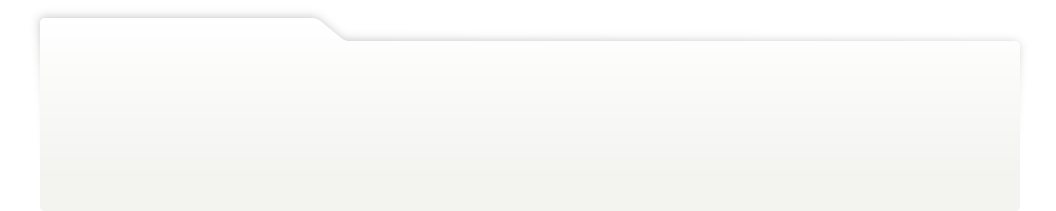
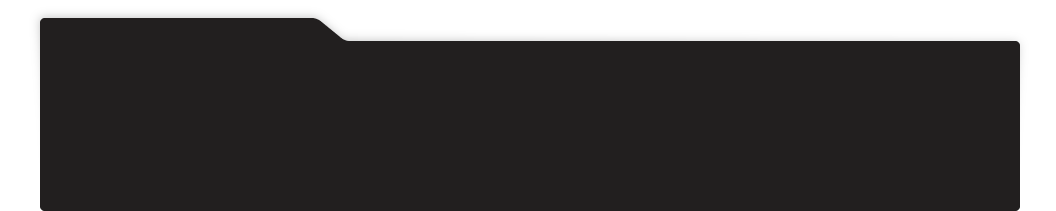
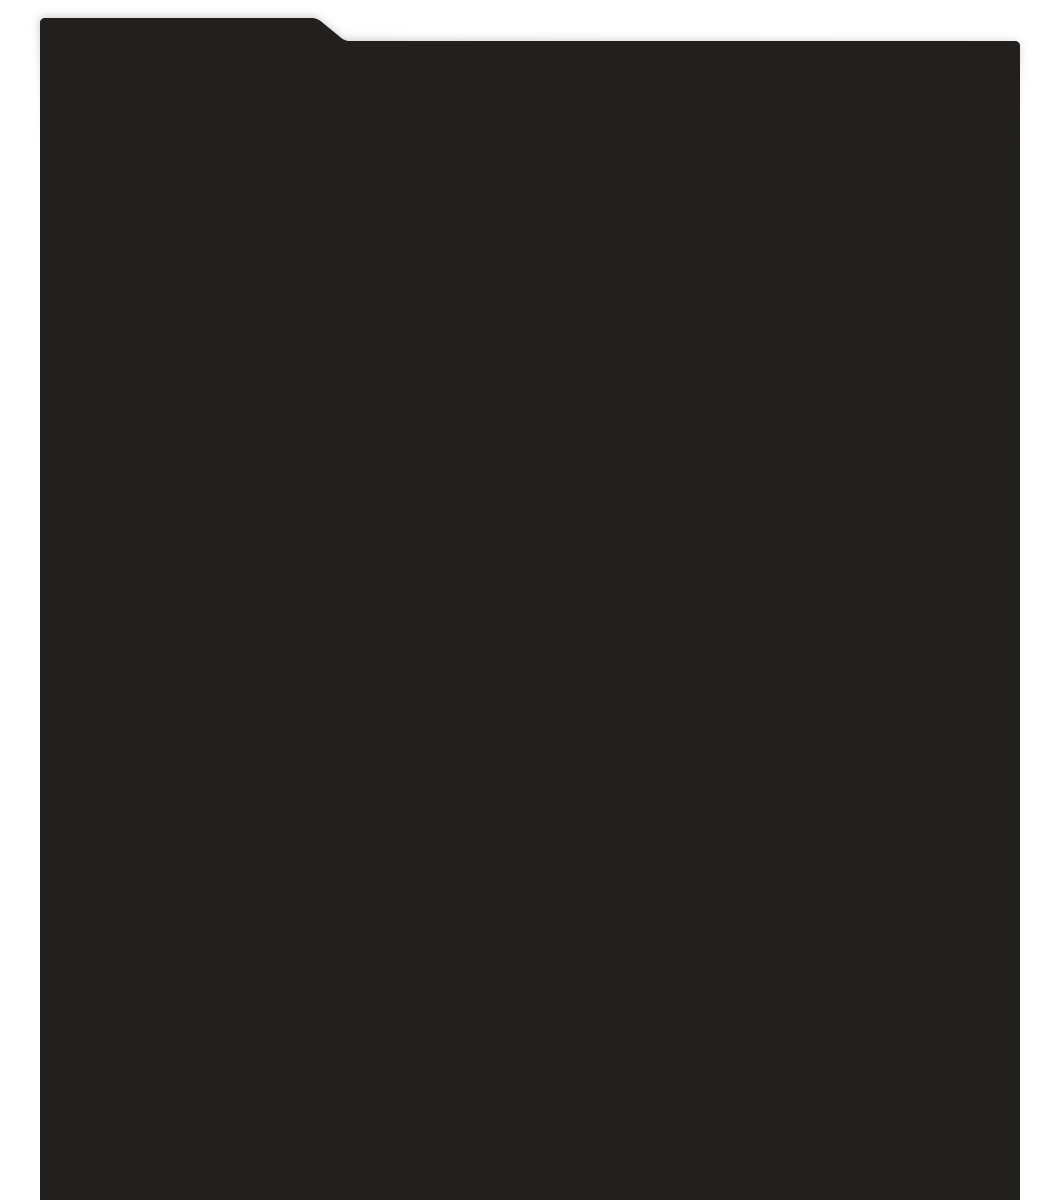
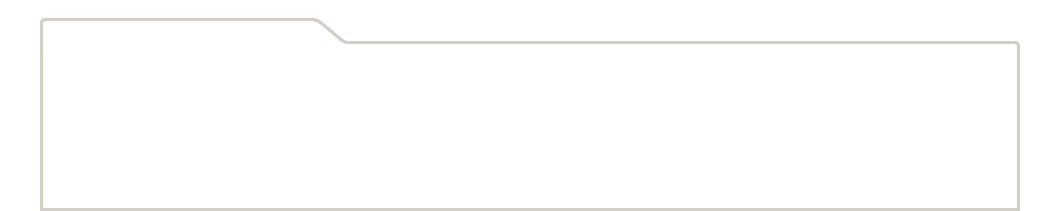
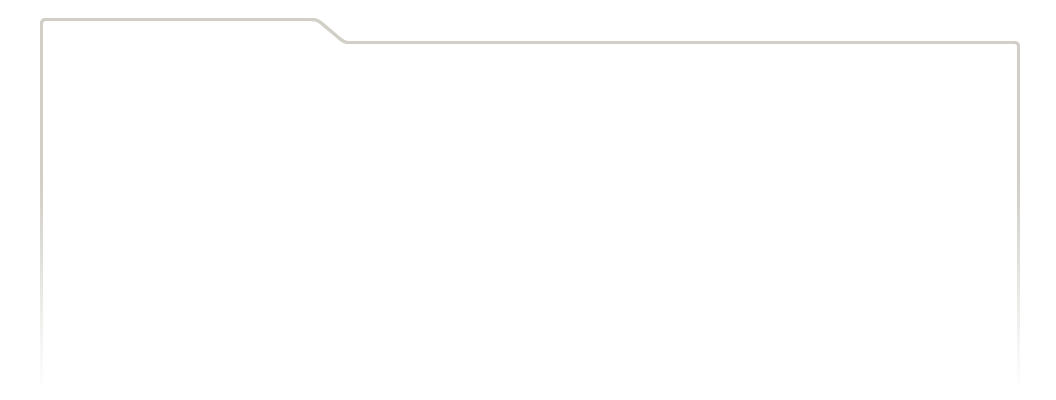
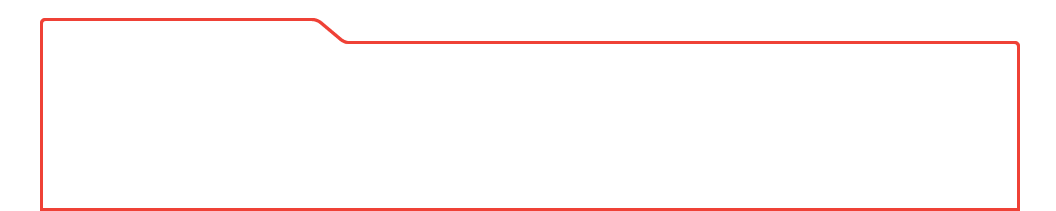
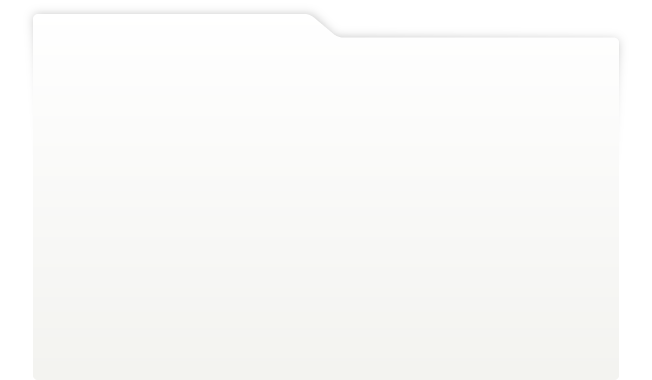
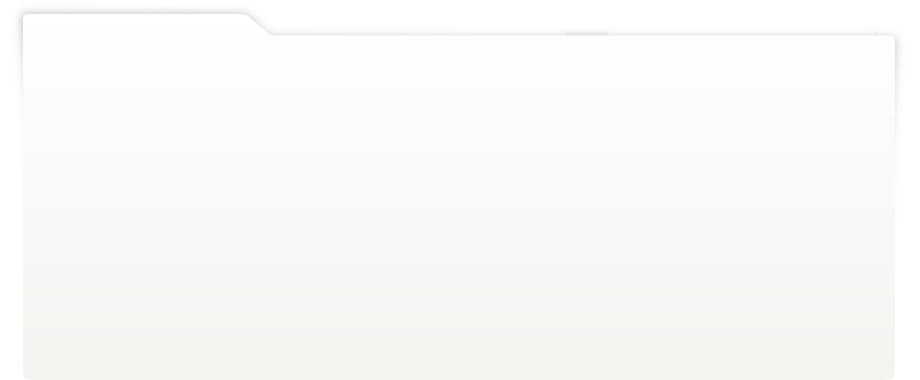
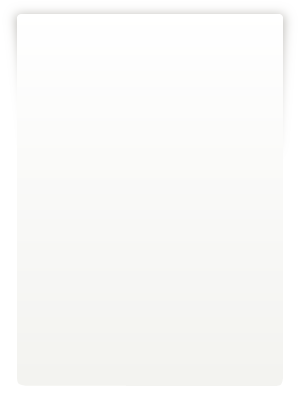
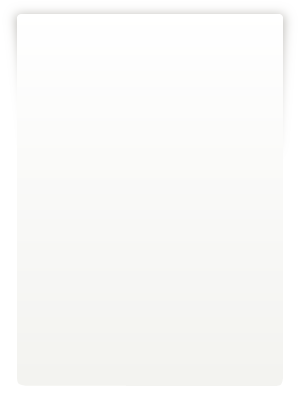
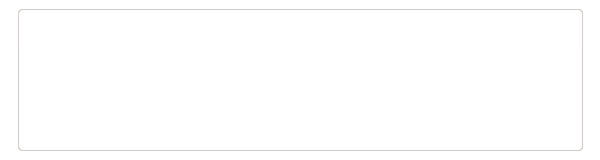
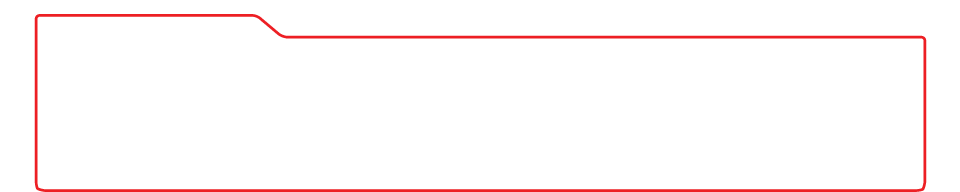
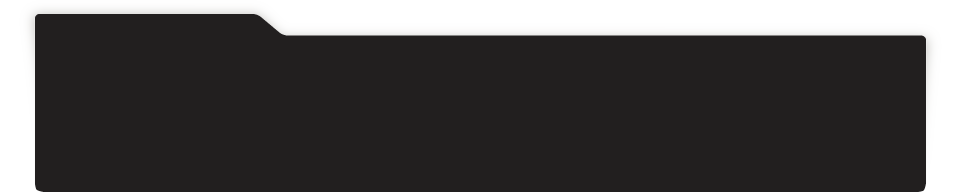
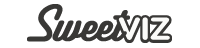
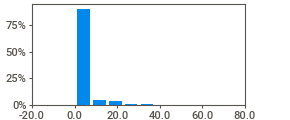
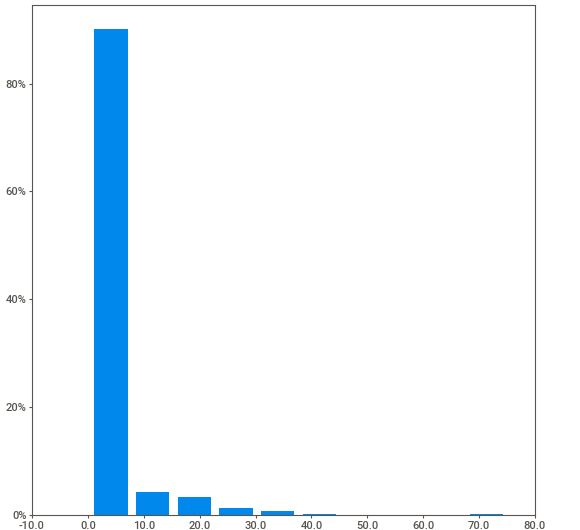
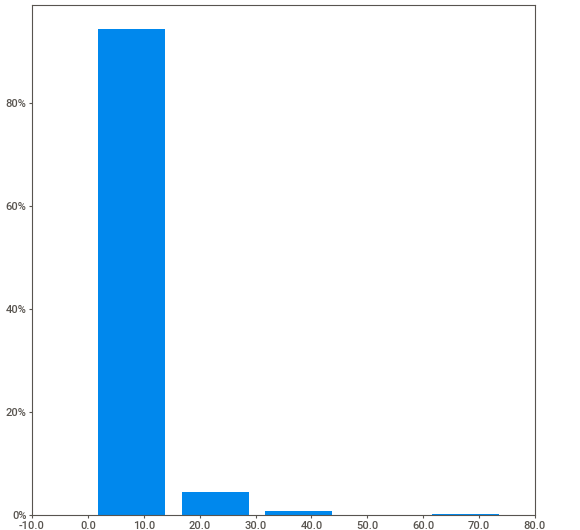
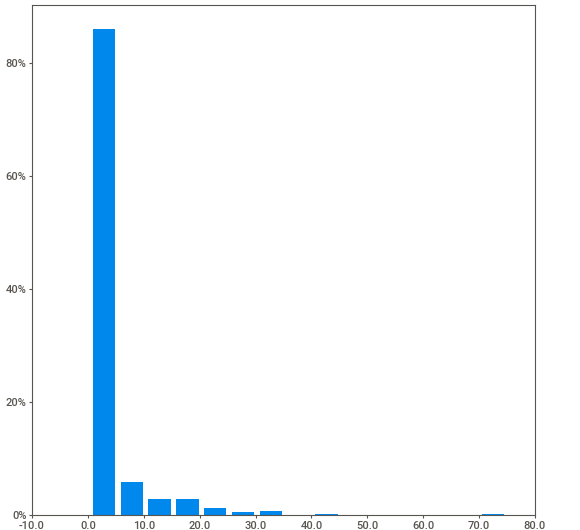
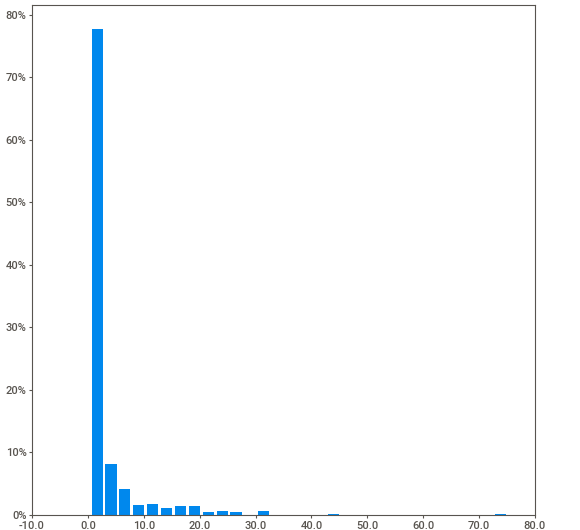
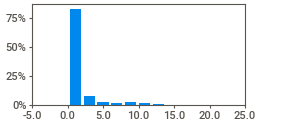
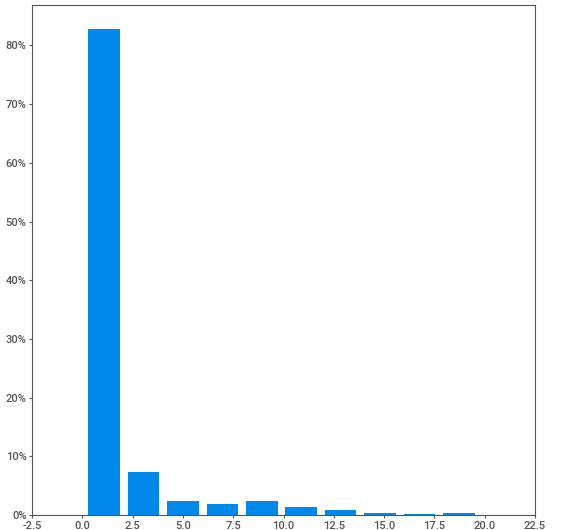
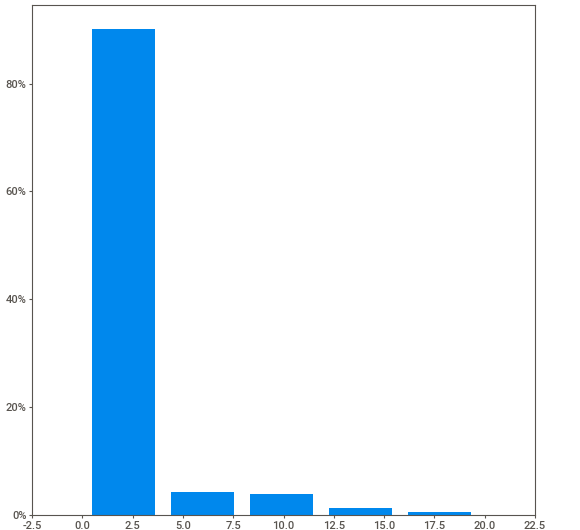
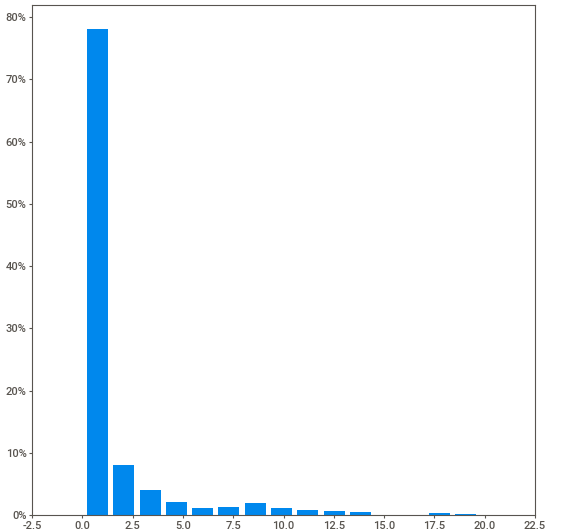
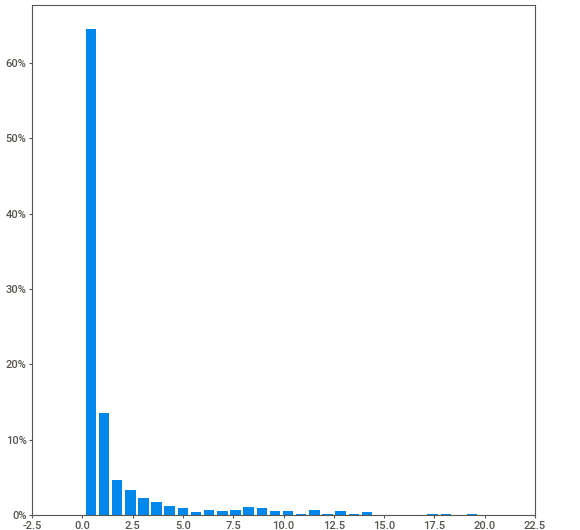
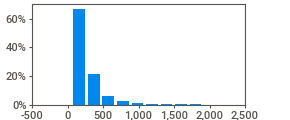
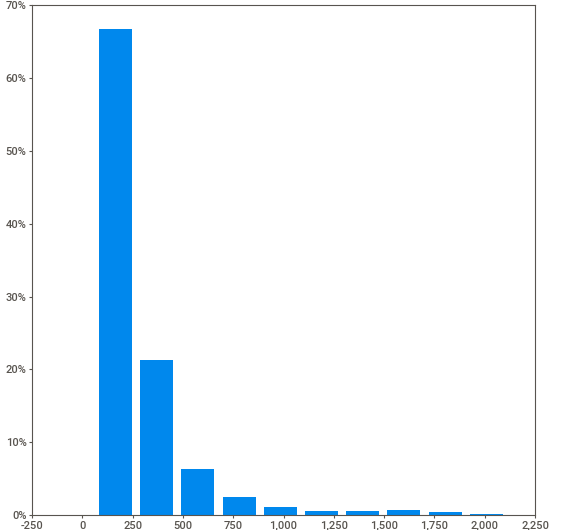
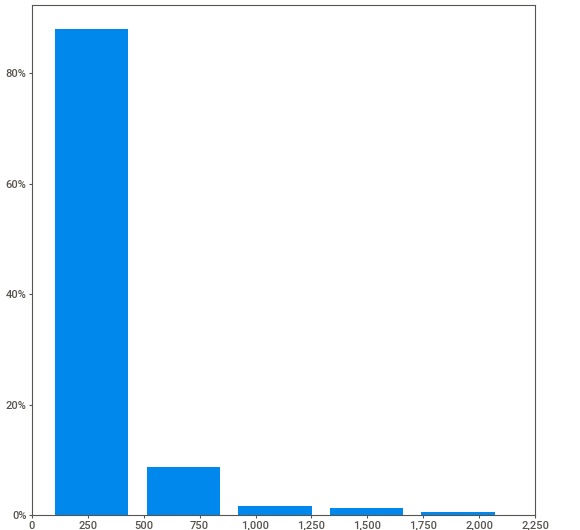
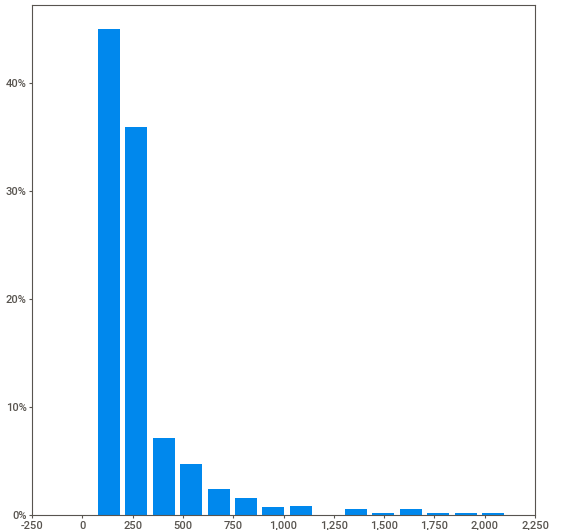
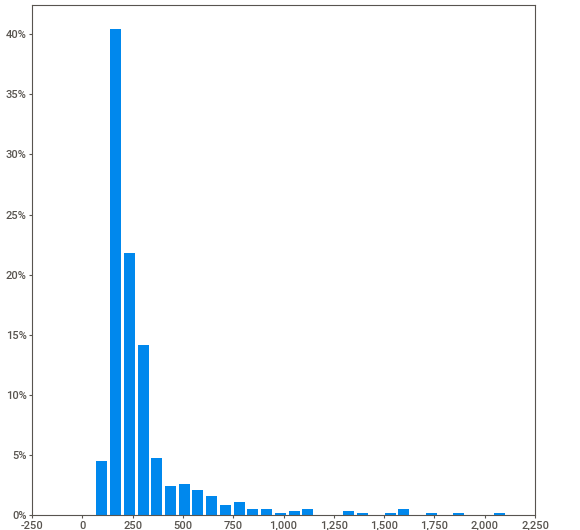
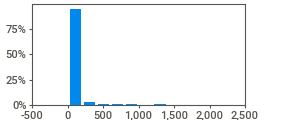
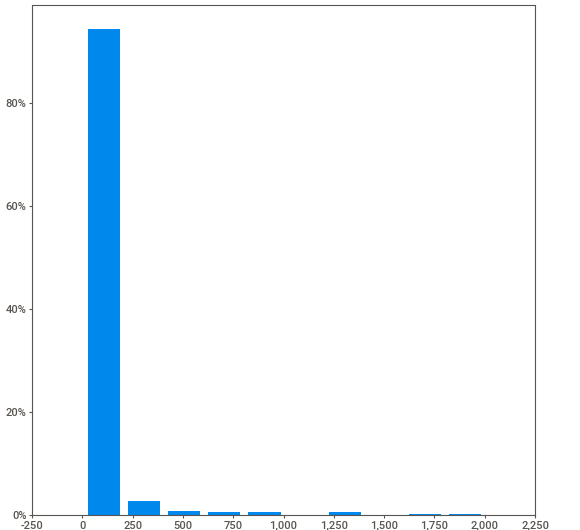
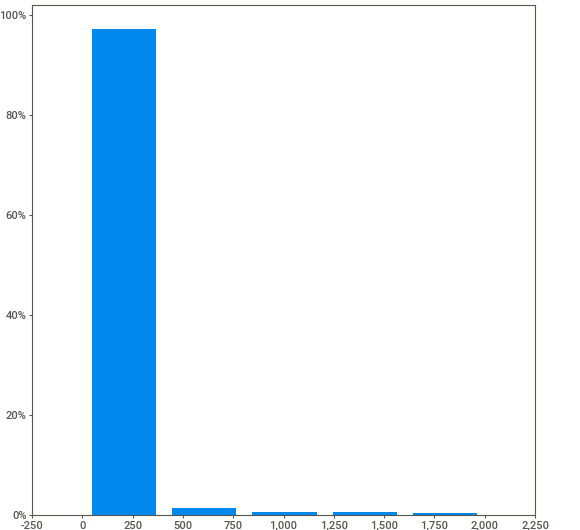
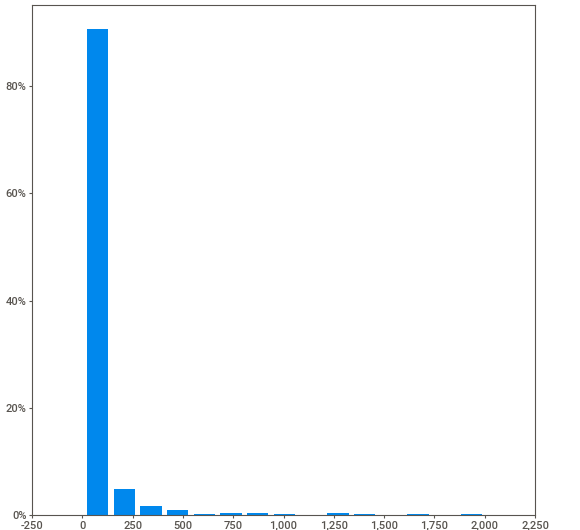
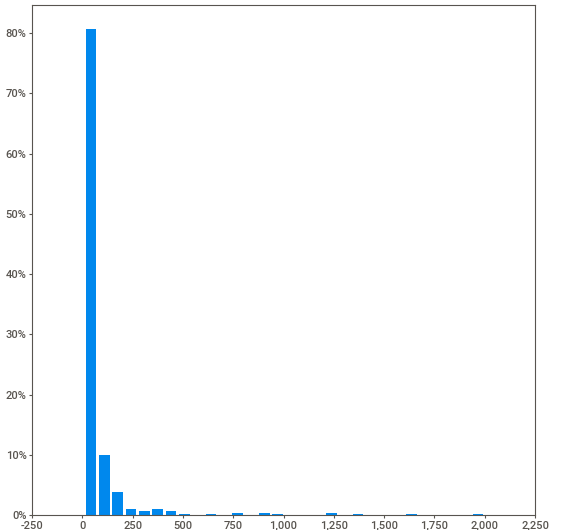
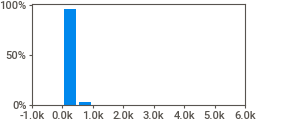
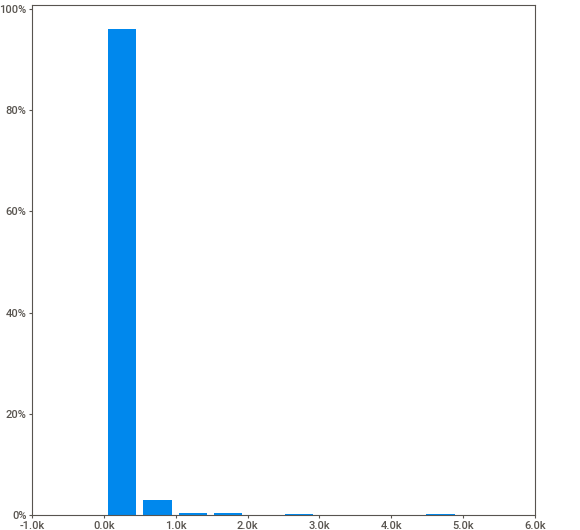
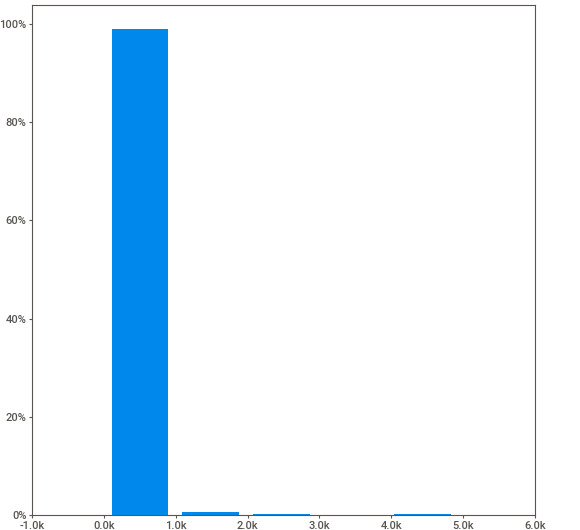
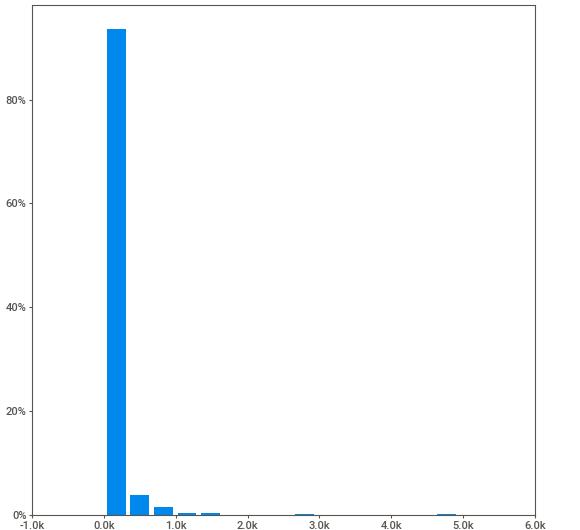
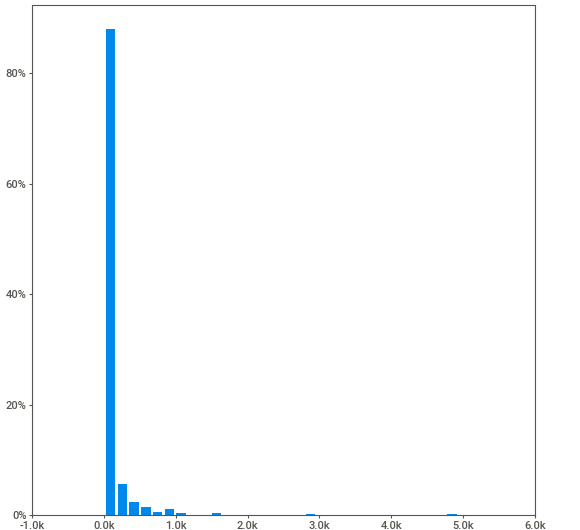
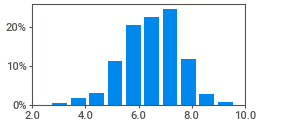
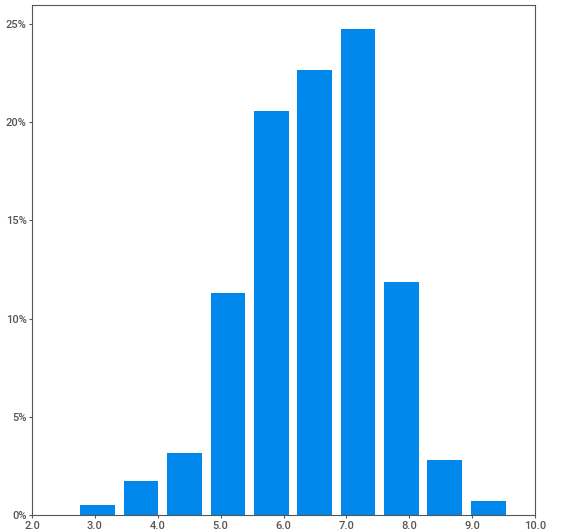
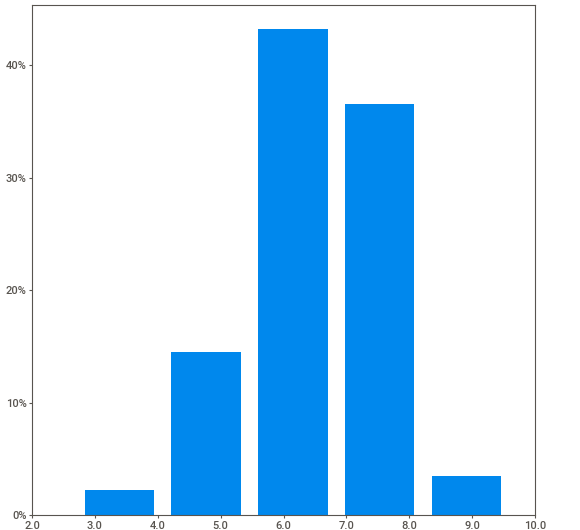
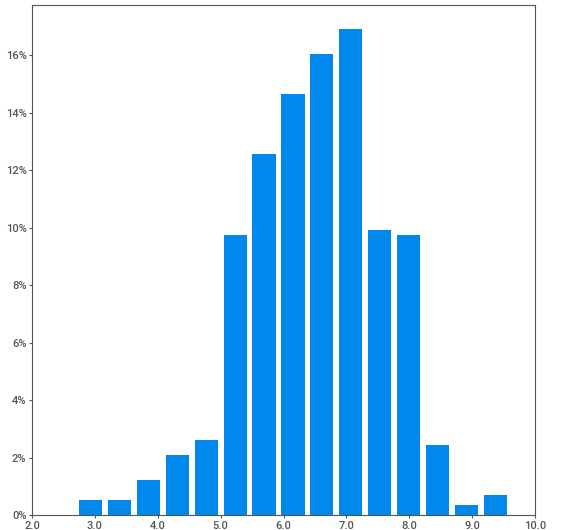
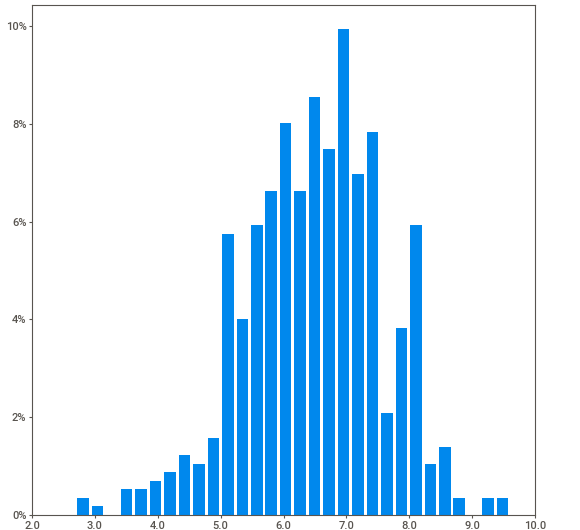
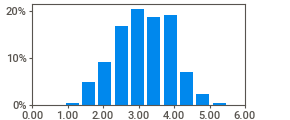
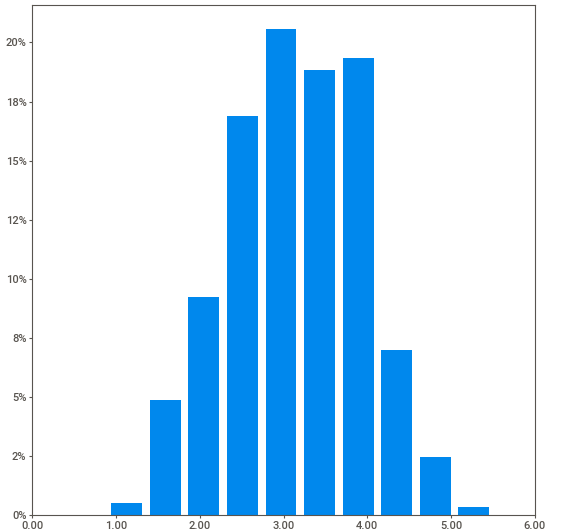
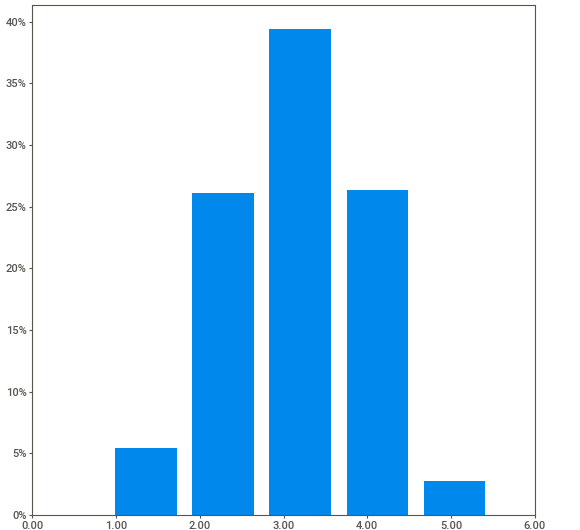
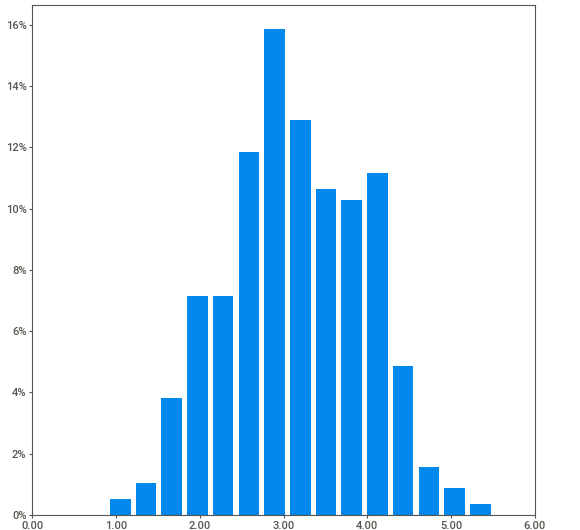
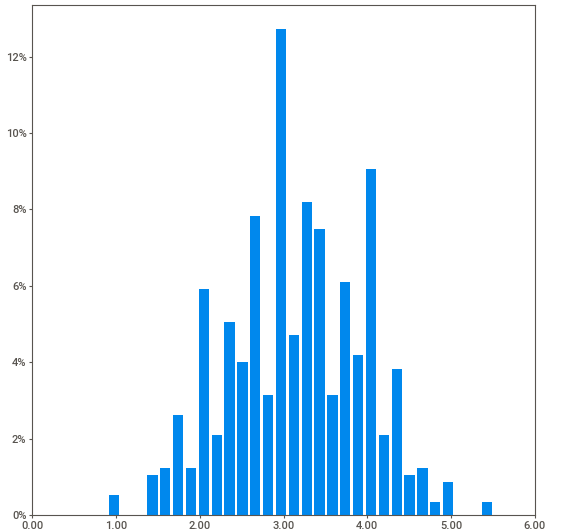
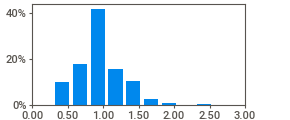
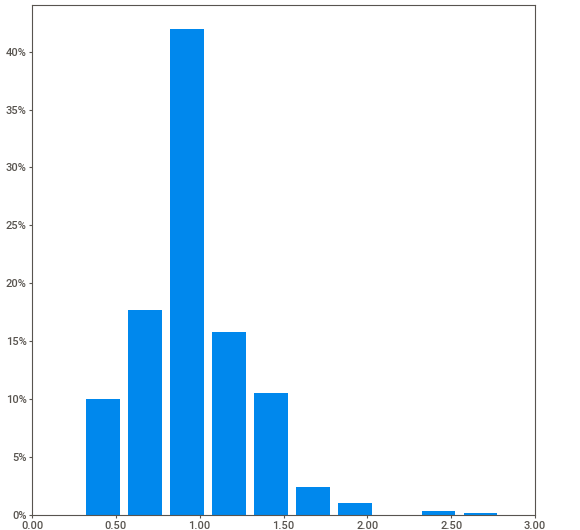
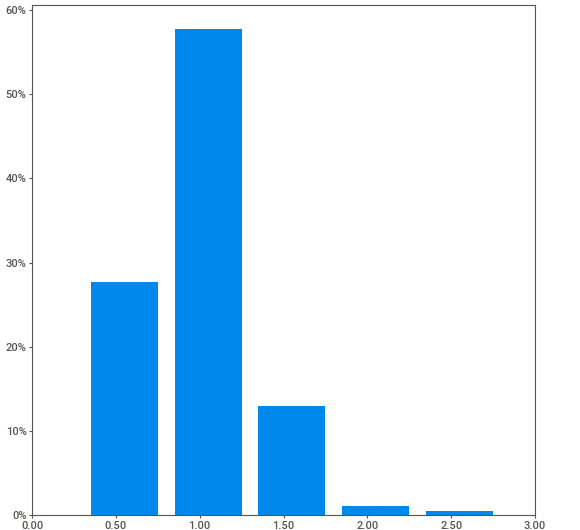
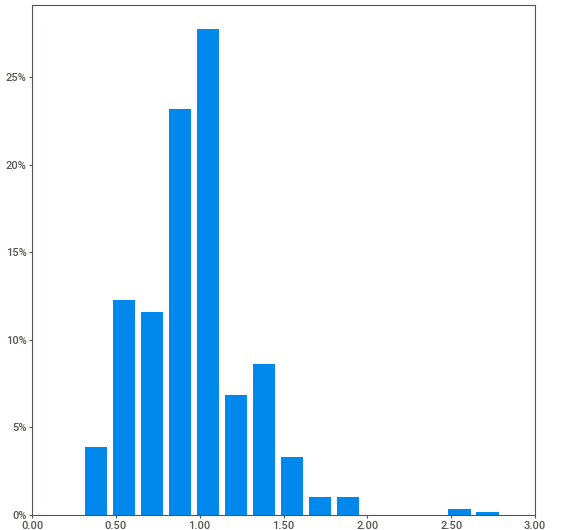
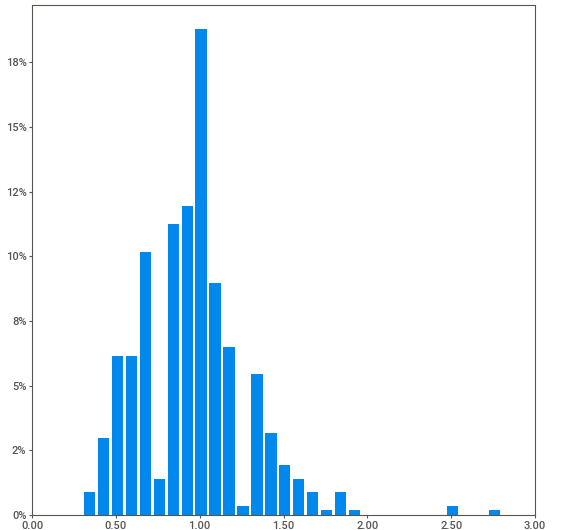
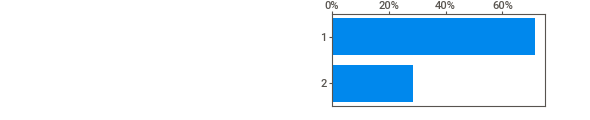
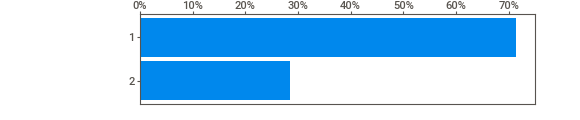
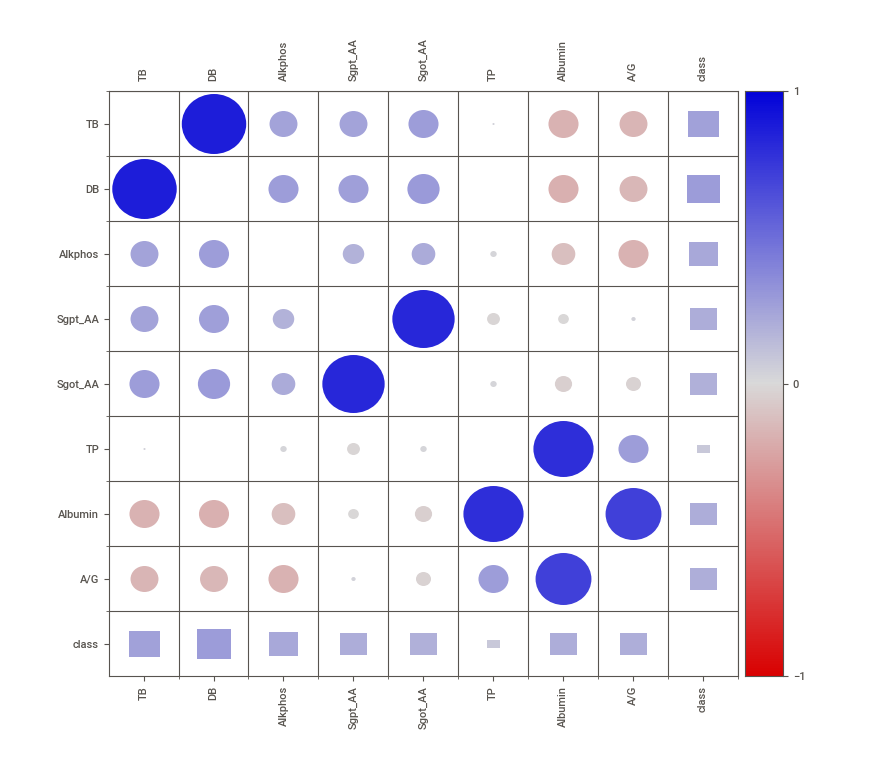
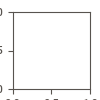

In [101]:
#sweet viz for instant EDA
!pip install sweetviz
import sweetviz as sv
sweet_report=sv.analyze(data)
sweet_report.show_notebook(layout='vertical', w=880, h=700, scale=0.8)

In [103]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_selection import SelectKBest, chi2

# Membuat objek imputer
imputer = IterativeImputer(max_iter=10, random_state=0)

# Mengisi nilai-nilai yang hilang dengan nilai hasil imputasi
X_imputed = imputer.fit_transform(X)

# Feature extraction dengan SelectKBest
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X_imputed, Y)

# Summarize scores
print(fit.scores_)
features = fit.transform(X_imputed)


[3.16861734e+02 1.79700278e+02 4.11032668e+03 5.68433138e+03
 9.79334667e+03 1.30509617e-01 3.20551153e+00 1.76250533e+00]


In [106]:
from sklearn.preprocessing import StandardScaler

# Normalisasi data menggunakan StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_imputed)

# Membuat objek model untuk RFE
model = LogisticRegression(max_iter=400)
rfe = RFE(model)
fit = rfe.fit(X_normalized, Y)

# Summarize selected features
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)


Num Features: 4
Selected Features: [False  True False  True  True False  True False]
Feature Ranking: [3 1 4 1 1 2 1 5]


In [107]:
fit.n_features_

4

In [108]:
fit.support_

array([False,  True, False,  True,  True, False,  True, False])

In [114]:
fit.ranking_

array([3, 1, 4, 1, 1, 2, 1, 5])

In [115]:
#SPLIT DATA

In [116]:
x=data.iloc[:,:-1]
y=data[['class']]
#splitting into dependent/class and independent variables

In [117]:
data.head()

,TB,DB,Alkphos,Sgpt_AA,Sgot_AA,TP,Albumin,A/G,class
0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [118]:
x.head()

,TB,DB,Alkphos,Sgpt_AA,Sgot_AA,TP,Albumin,A/G
0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,7.3,4.1,490,60,68,7.0,3.3,0.89
3,1.0,0.4,182,14,20,6.8,3.4,1.00
4,3.9,2.0,195,27,59,7.3,2.4,0.40


In [119]:
y.head()

,class
0,1
1,1
2,1
3,1
4,1


In [120]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.20, random_state=0) #dengan rasio 20:80

In [83]:
#menambahkan KFold Cross Validation

In [84]:
#the number of spllits made are 10.
from sklearn.model_selection import KFold
kfold=KFold(n_splits=10) #here each fold contains 25 data points

In [85]:
#Menambahkan Algortima Decision Tree

In [99]:
data.head()

,TB,DB,Alkphos,Sgpt_AA,Sgot_AA,TP,Albumin,A/G,class
0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [121]:
#training the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
model_destree=BaggingClassifier(DecisionTreeClassifier(max_depth=6),random_state=0)
model_destree=AdaBoostClassifier(DecisionTreeClassifier(max_depth=6),random_state=0)

In [127]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import AdaBoostClassifier

# Membuat objek imputer
imputer = SimpleImputer(strategy='mean')

# Mengisi nilai-nilai yang hilang dengan nilai rata-rata
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Membuat objek model AdaBoostClassifier
model_adaboost = AdaBoostClassifier()
model_adaboost.fit(x_train_imputed, y_train)

# Melakukan prediksi
pred_adaboost = model_adaboost.predict(x_test_imputed)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [141]:
# print("Hasil akurasi dengan model Split Validation menggunakan Decision Tree: ",accuracy_score(y_test,pred_destree)*100,"%")
from sklearn.metrics import accuracy_score

# Menghitung akurasi pada data uji
accuracy = accuracy_score(y_test, pred_adaboost)*100

# Menampilkan hasil akurasi
print(f'Accuracy: {accuracy}')


Accuracy: 60.0


In [140]:
from sklearn.metrics import accuracy_score

# Melakukan prediksi pada data pelatihan
pred_train_adaboost = model_adaboost.predict(x_train_imputed)

# Menghitung akurasi pada data pelatihan
accuracy_train = accuracy_score(y_train, pred_train_adaboost)*100

# Menampilkan hasil akurasi pada data pelatihan
print(f'Training Accuracy: {accuracy_train}')


Training Accuracy: 83.87799564270153


In [148]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer

# Membuat objek imputer
imputer = SimpleImputer(strategy='mean')

# Mengisi nilai-nilai yang hilang dengan nilai rata-rata
x_train_imputed = imputer.fit_transform(x_train)

# Membuat objek model DecisionTreeClassifier
model_decision_tree = DecisionTreeClassifier()

# Menggunakan K-Fold Cross Validation untuk menghitung akurasi
cv_scores_decision_tree = cross_val_score(model_decision_tree, x_train_imputed, y_train, cv=5)  # Sesuaikan jumlah fold cv sesuai kebutuhan

# Menampilkan hasil akurasi pada setiap fold
for i, score in enumerate(cv_scores_decision_tree, 1):
    print(f'Fold {i} Accuracy: {score * 100:.2f}%')

# Menampilkan rata-rata akurasi dari semua fold
print(f'\nAverage Accuracy: {cv_scores_decision_tree.mean() * 100:.2f}%')


Fold 1 Accuracy: 61.96%
Fold 2 Accuracy: 64.13%
Fold 3 Accuracy: 66.30%
Fold 4 Accuracy: 63.04%
Fold 5 Accuracy: 61.54%

Average Accuracy: 63.39%


In [150]:
# from sklearn.metrics import classification_report
# print(classification_report(y_test,pred_destree))

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Membuat objek imputer
imputer = SimpleImputer(strategy='mean')

# Mengisi nilai-nilai yang hilang dengan nilai rata-rata
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Membuat objek model DecisionTreeClassifier
model_decision_tree = DecisionTreeClassifier()

# Melatih model pada data pelatihan
model_decision_tree.fit(x_train_imputed, y_train)

# Melakukan prediksi pada data uji
pred_destree = model_decision_tree.predict(x_test_imputed)

# Menampilkan classification report
print(classification_report(y_test, pred_destree))


              precision    recall  f1-score   support

           1       0.73      0.74      0.73        80
           2       0.38      0.37      0.38        35

    accuracy                           0.63       115
   macro avg       0.56      0.55      0.55       115
weighted avg       0.62      0.63      0.62       115



In [152]:
# print(confusion_matrix(y_test,pred_destree))

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Membuat objek imputer
imputer = SimpleImputer(strategy='mean')

# Mengisi nilai-nilai yang hilang dengan nilai rata-rata
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Membuat objek model DecisionTreeClassifier
model_decision_tree = DecisionTreeClassifier()

# Melatih model pada data pelatihan
model_decision_tree.fit(x_train_imputed, y_train)

# Melakukan prediksi pada data uji
pred_destree = model_decision_tree.predict(x_test_imputed)

# Menampilkan confusion matrix
print(confusion_matrix(y_test, pred_destree))


[[58 22]
 [20 15]]
